In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
import shap
import xgboost

In [2]:
df=pd.read_csv('taskdata.csv')

In [3]:
df.shape

(4407, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
user_id                  4407 non-null int64
account_id               4400 non-null float64
max_return_days          4407 non-null int64
average_return_days      4407 non-null float64
customer_since_months    4407 non-null int64
total_revenue            4407 non-null float64
average_revenue          4407 non-null float64
avg_vas_count            4407 non-null float64
avg_used_vas_value       4407 non-null float64
business_type            4407 non-null int64
avg_wallet_bonus         4407 non-null float64
avg_active_ads           4407 non-null float64
avg_new_ads              4407 non-null float64
avg_email_replies        4407 non-null float64
avg_call_replies         4407 non-null float64
avg_sms_replies          4407 non-null float64
target                   4407 non-null int64
dtypes: float64(12), int64(5)
memory usage: 585.4 KB


In [5]:
df.describe()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.407000e+03,4400.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,4.106655e+09,506.553864,22.335602,7.171576,9.874064,194.130365,16.942615,3.249388,72.119006,0.497844,338.851046,98.922260,16.812003,25.681004,27.622151,0.162009,0.103245
std,6.794948e+09,326.072756,43.591246,19.209092,5.169639,1548.361547,128.268824,5.509869,117.019515,1.199725,831.746150,297.692950,68.045904,55.324218,61.069006,0.517693,0.304313
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184510e+08,226.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.142857,2.727273,0.000000,0.000000,13.500000,2.500000,4.461538,4.384615,0.000000,0.000000
50%,7.296626e+08,493.000000,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,40.000000,40.000000,6.333333,12.266667,12.933333,0.000000,0.000000
75%,7.292936e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,0.000000,4.333333,100.000000,0.000000,327.280000,101.291667,14.250000,28.000000,30.784615,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


In [6]:
df = df[pd.notnull(df['account_id'])]

In [7]:
df.isnull().sum()

user_id                  0
account_id               0
max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014FCE73C3C8>,
      dtype=object)

<Figure size 2160x1440 with 0 Axes>

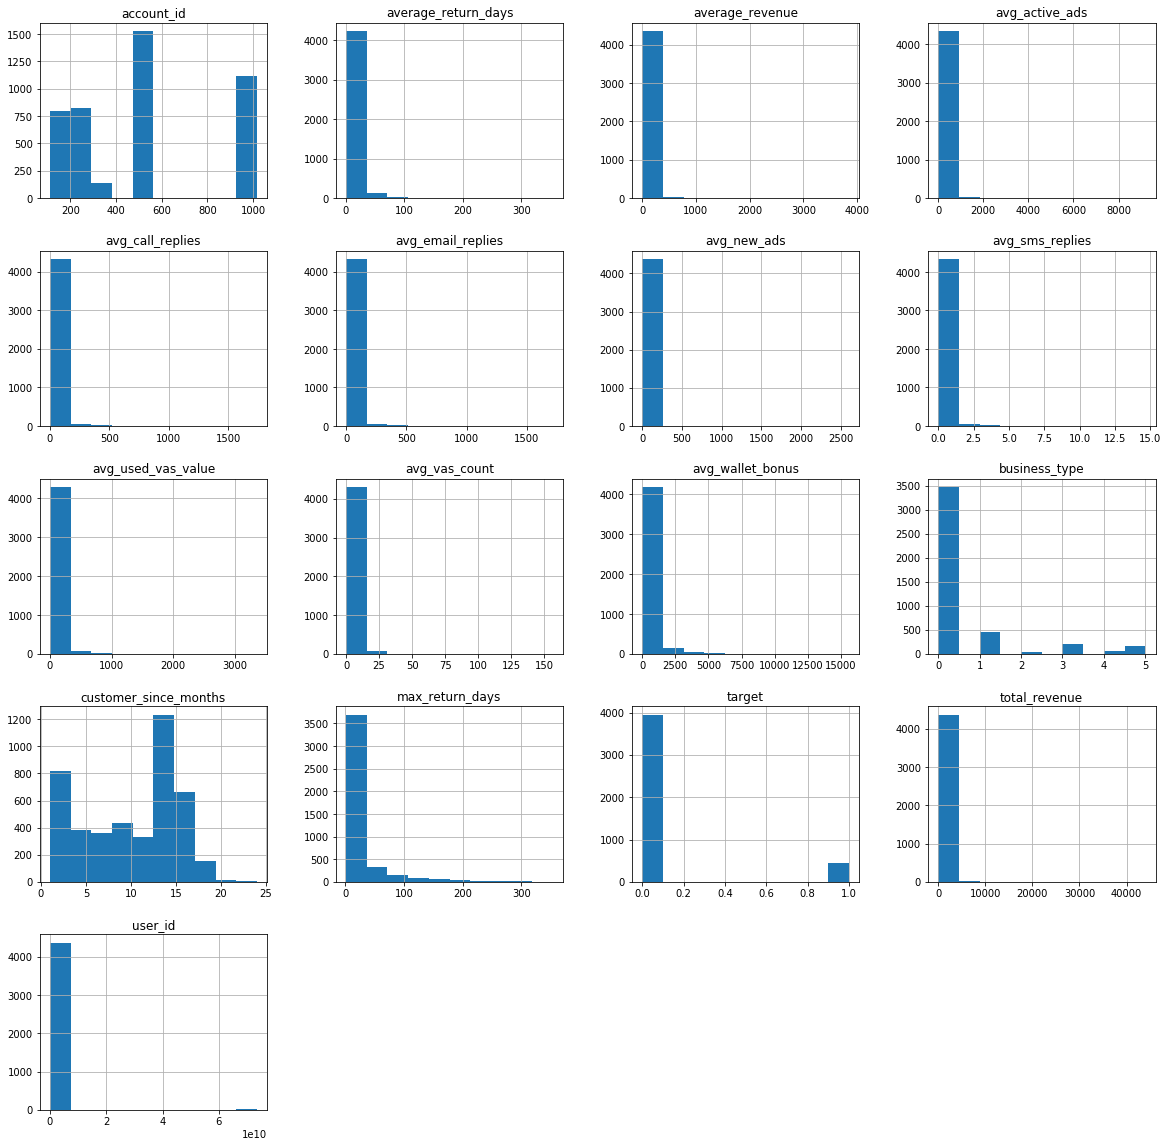

In [8]:
plt.figure(figsize=(30,20))

df.hist(figsize=(20,20))

In [9]:
df.corr()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
user_id,1.000000,0.056700,0.028626,0.027063,-0.181671,-0.033228,-0.016299,-0.101715,-0.113532,0.042191,-0.096223,-0.061172,-0.003543,-0.105052,-0.098219,-0.070978,0.048218
account_id,0.056700,1.000000,0.186045,0.114084,-0.138623,-0.056088,-0.063251,-0.123744,-0.137692,-0.023560,-0.115246,-0.104818,-0.049433,-0.111508,-0.115326,-0.082611,0.121939
max_return_days,0.028626,0.186045,1.000000,0.749133,-0.187866,-0.001889,0.013184,-0.112382,-0.119129,-0.018485,-0.131552,-0.042902,-0.009146,-0.075940,-0.079302,-0.050359,0.275500
average_return_days,0.027063,0.114084,0.749133,1.000000,-0.257220,-0.014447,-0.006567,-0.108128,-0.114067,0.027346,-0.103593,-0.047031,-0.017632,-0.070784,-0.070982,-0.038793,0.166119
customer_since_months,-0.181671,-0.138623,-0.187866,-0.257220,1.000000,0.090466,0.063811,0.320958,0.350325,-0.217427,0.351896,0.138805,0.020578,0.206001,0.206257,0.122789,-0.235238
total_revenue,-0.033228,-0.056088,-0.001889,-0.014447,0.090466,1.000000,0.950357,0.608638,0.642191,-0.017400,0.075885,0.341788,0.131101,0.214032,0.214258,0.213352,-0.032580
average_revenue,-0.016299,-0.063251,0.013184,-0.006567,0.063811,0.950357,1.000000,0.586291,0.612613,-0.001530,0.070007,0.354482,0.132759,0.209668,0.209233,0.214889,-0.025354
avg_vas_count,-0.101715,-0.123744,-0.112382,-0.108128,0.320958,0.608638,0.586291,1.000000,0.962294,-0.119417,0.130987,0.413871,0.192561,0.360600,0.342573,0.240456,-0.117154
avg_used_vas_value,-0.113532,-0.137692,-0.119129,-0.114067,0.350325,0.642191,0.612613,0.962294,1.000000,-0.119371,0.156046,0.407629,0.186521,0.362861,0.347016,0.244097,-0.128464
business_type,0.042191,-0.023560,-0.018485,0.027346,-0.217427,-0.017400,-0.001530,-0.119417,-0.119371,1.000000,-0.107314,-0.076037,-0.004429,-0.050023,-0.053766,0.005707,0.005954


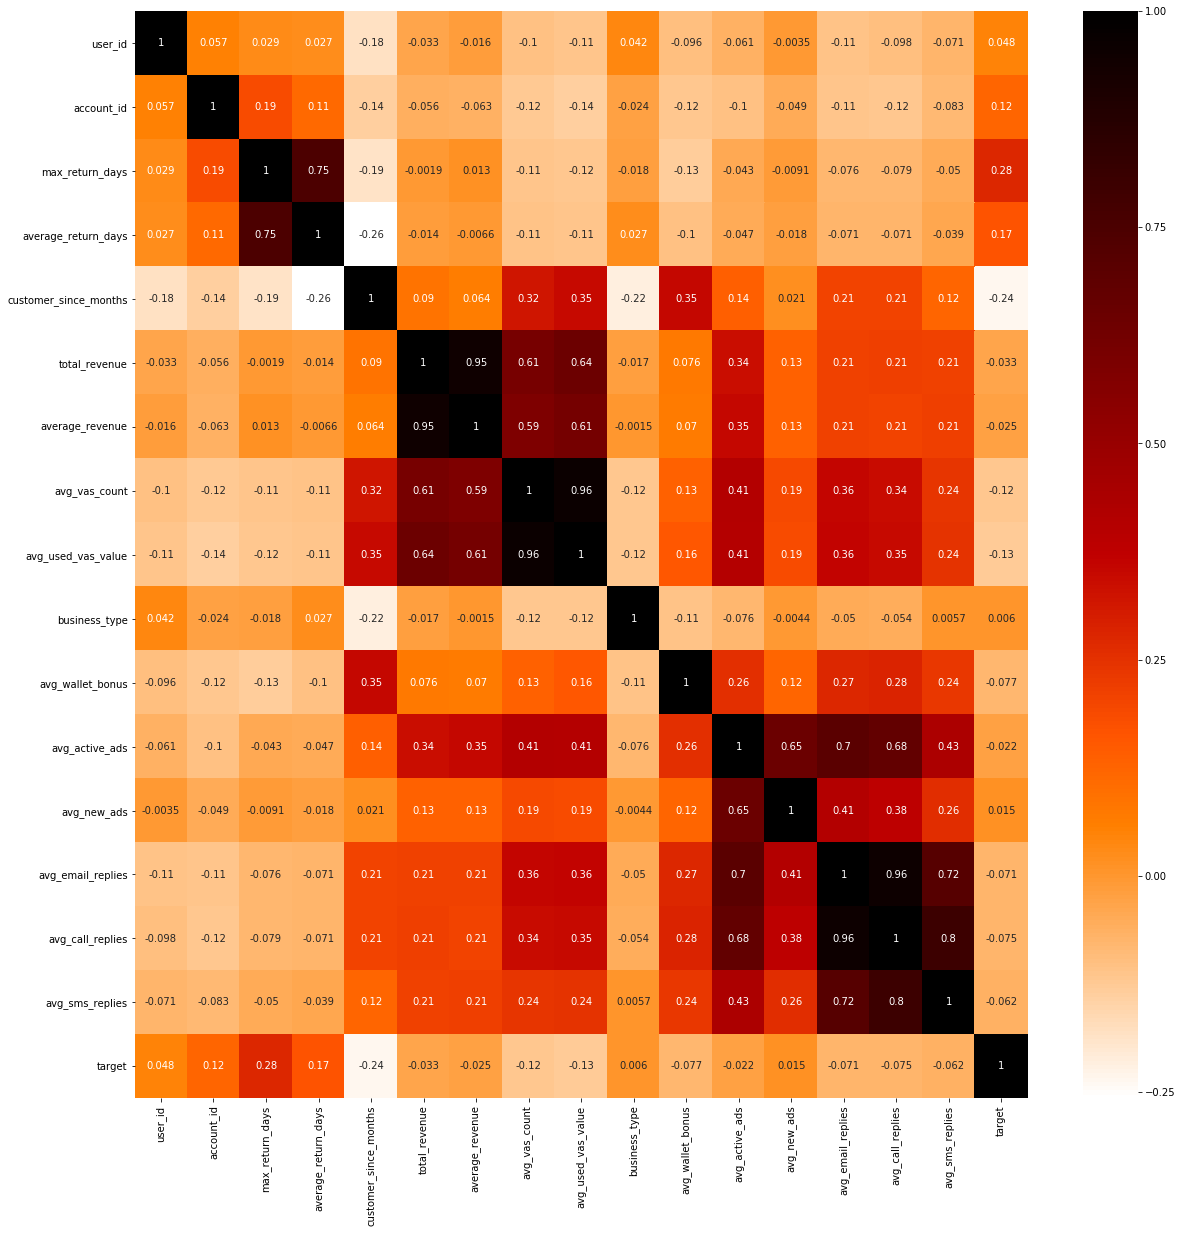

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='gist_heat_r',annot=True)

<Figure size 360x864 with 0 Axes>

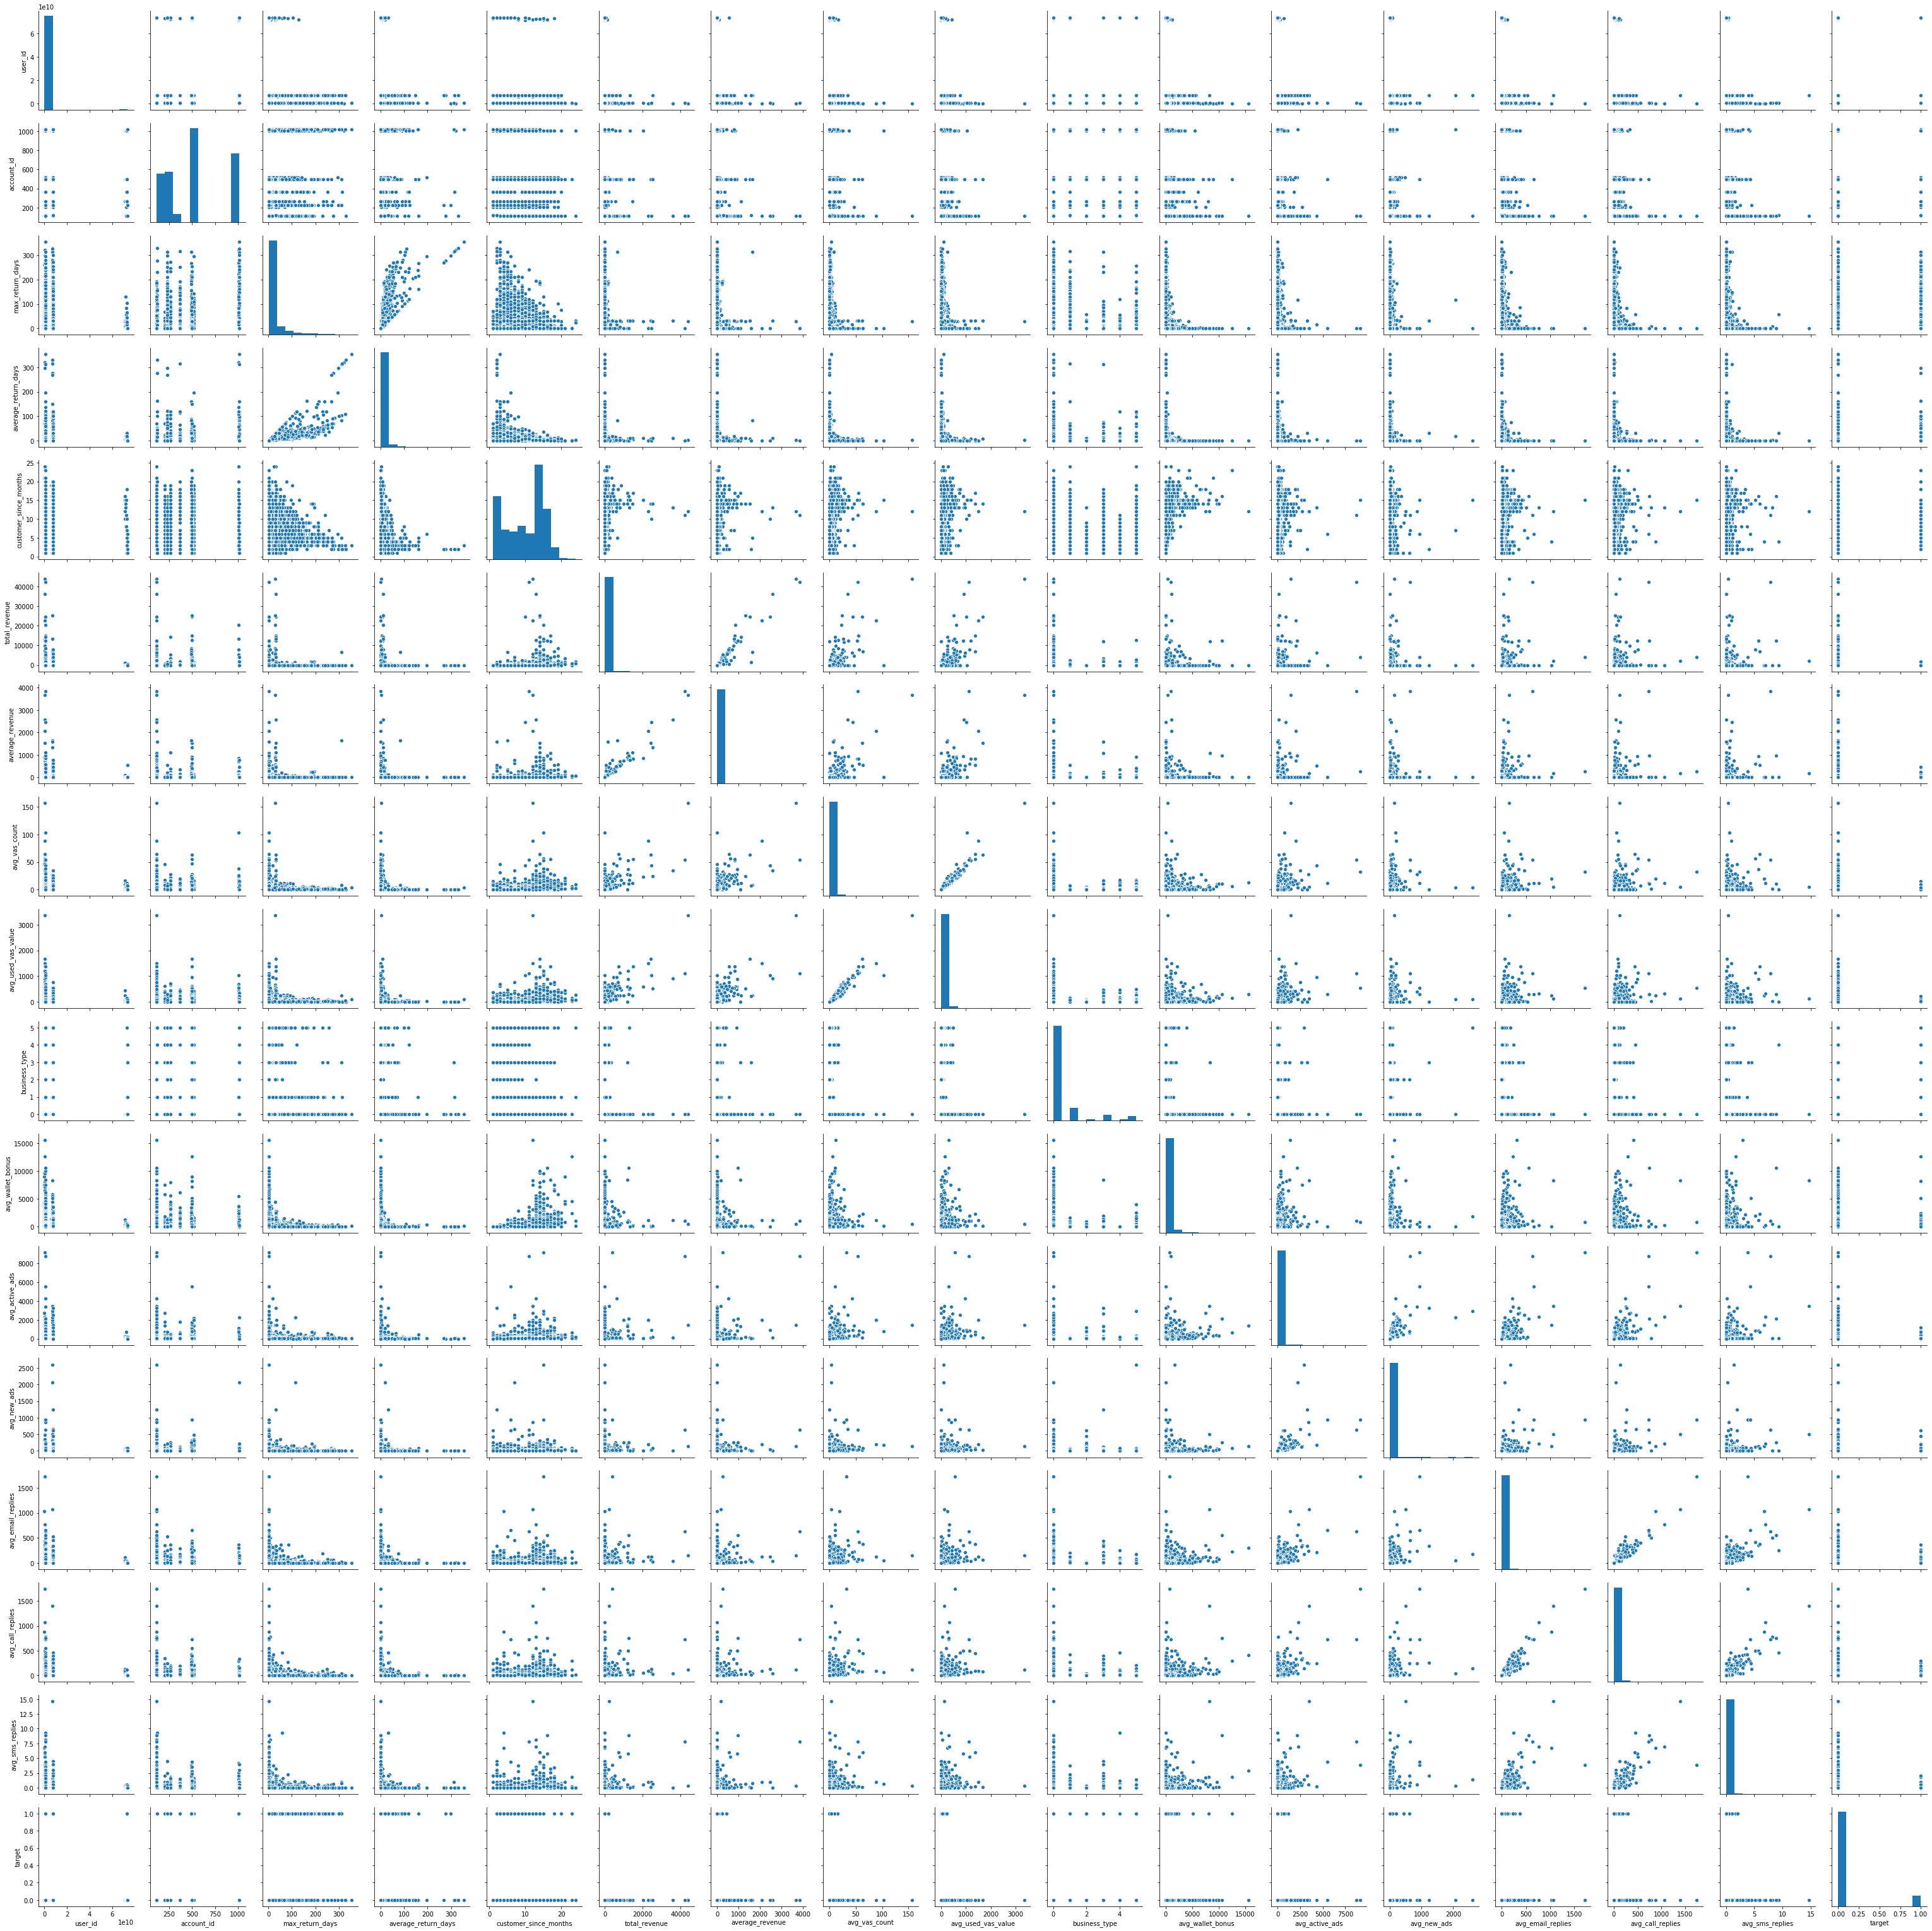

In [11]:
plt.figure(figsize=(5,12))

sns.pairplot(df)

In [12]:
y = df.target
X = df.drop('target', axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [14]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.9136363636363637

In [16]:
a= confusion_matrix(y_test, y_pred)  
print(a)  

[[804   0]
 [ 76   0]]


In [17]:
print(classification_report(y_test, y_pred))

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       804
           1       0.00      0.00      0.00        76

    accuracy                           0.91       880
   macro avg       0.46      0.50      0.48       880
weighted avg       0.83      0.91      0.87       880



In [18]:
model = xgboost.XGBClassifier().fit(X_train, y_train)
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

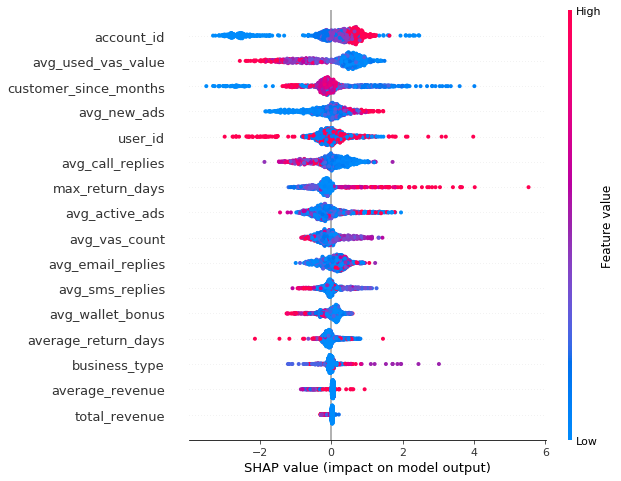

In [19]:
shap.plots.beeswarm(shap_values)